In [2]:
from qiskit import IBMQ
from qiskit.tools.jupyter import *

# Load your IBM Quantum account
IBMQ.load_account()


C:\Users\user\AppData\Local\Temp\ipykernel_3364\429940755.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
import importlib
import graph
graph_class = importlib.reload(graph)


In [3]:
# Choose your backend
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend.name())

ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_brisbane
ibm_kyoto
ibm_osaka


In [4]:
backend = provider.get_backend('ibm_brisbane')  # Example backend

# Get the coupling map
coupling_map = backend.configuration().coupling_map
# Print the coupling map
# print("Coupling map:", coupling_map)

In [5]:
print(*coupling_map)

[1, 0] [2, 1] [3, 2] [4, 3] [4, 5] [4, 15] [6, 5] [6, 7] [7, 8] [8, 9] [10, 9] [10, 11] [11, 12] [12, 17] [13, 12] [14, 0] [14, 18] [15, 22] [16, 8] [16, 26] [17, 30] [18, 19] [20, 19] [20, 33] [21, 20] [21, 22] [22, 23] [24, 23] [24, 34] [25, 24] [26, 25] [27, 26] [28, 27] [28, 29] [28, 35] [30, 29] [30, 31] [31, 32] [32, 36] [33, 39] [34, 43] [35, 47] [36, 51] [37, 38] [39, 38] [40, 39] [40, 41] [41, 53] [42, 41] [42, 43] [43, 44] [44, 45] [46, 45] [46, 47] [48, 47] [48, 49] [50, 49] [50, 51] [52, 37] [52, 56] [53, 60] [54, 45] [54, 64] [55, 49] [55, 68] [56, 57] [57, 58] [58, 59] [58, 71] [59, 60] [60, 61] [62, 61] [62, 63] [62, 72] [63, 64] [65, 64] [65, 66] [67, 66] [67, 68] [69, 68] [69, 70] [73, 66] [74, 70] [74, 89] [75, 90] [76, 75] [77, 71] [77, 76] [77, 78] [79, 78] [79, 80] [80, 81] [81, 72] [81, 82] [82, 83] [83, 92] [84, 83] [85, 73] [85, 84] [85, 86] [86, 87] [87, 88] [88, 89] [91, 79] [92, 102] [93, 87] [93, 106] [94, 90] [94, 95] [95, 96] [97, 96] [97, 98] [98, 91] [99

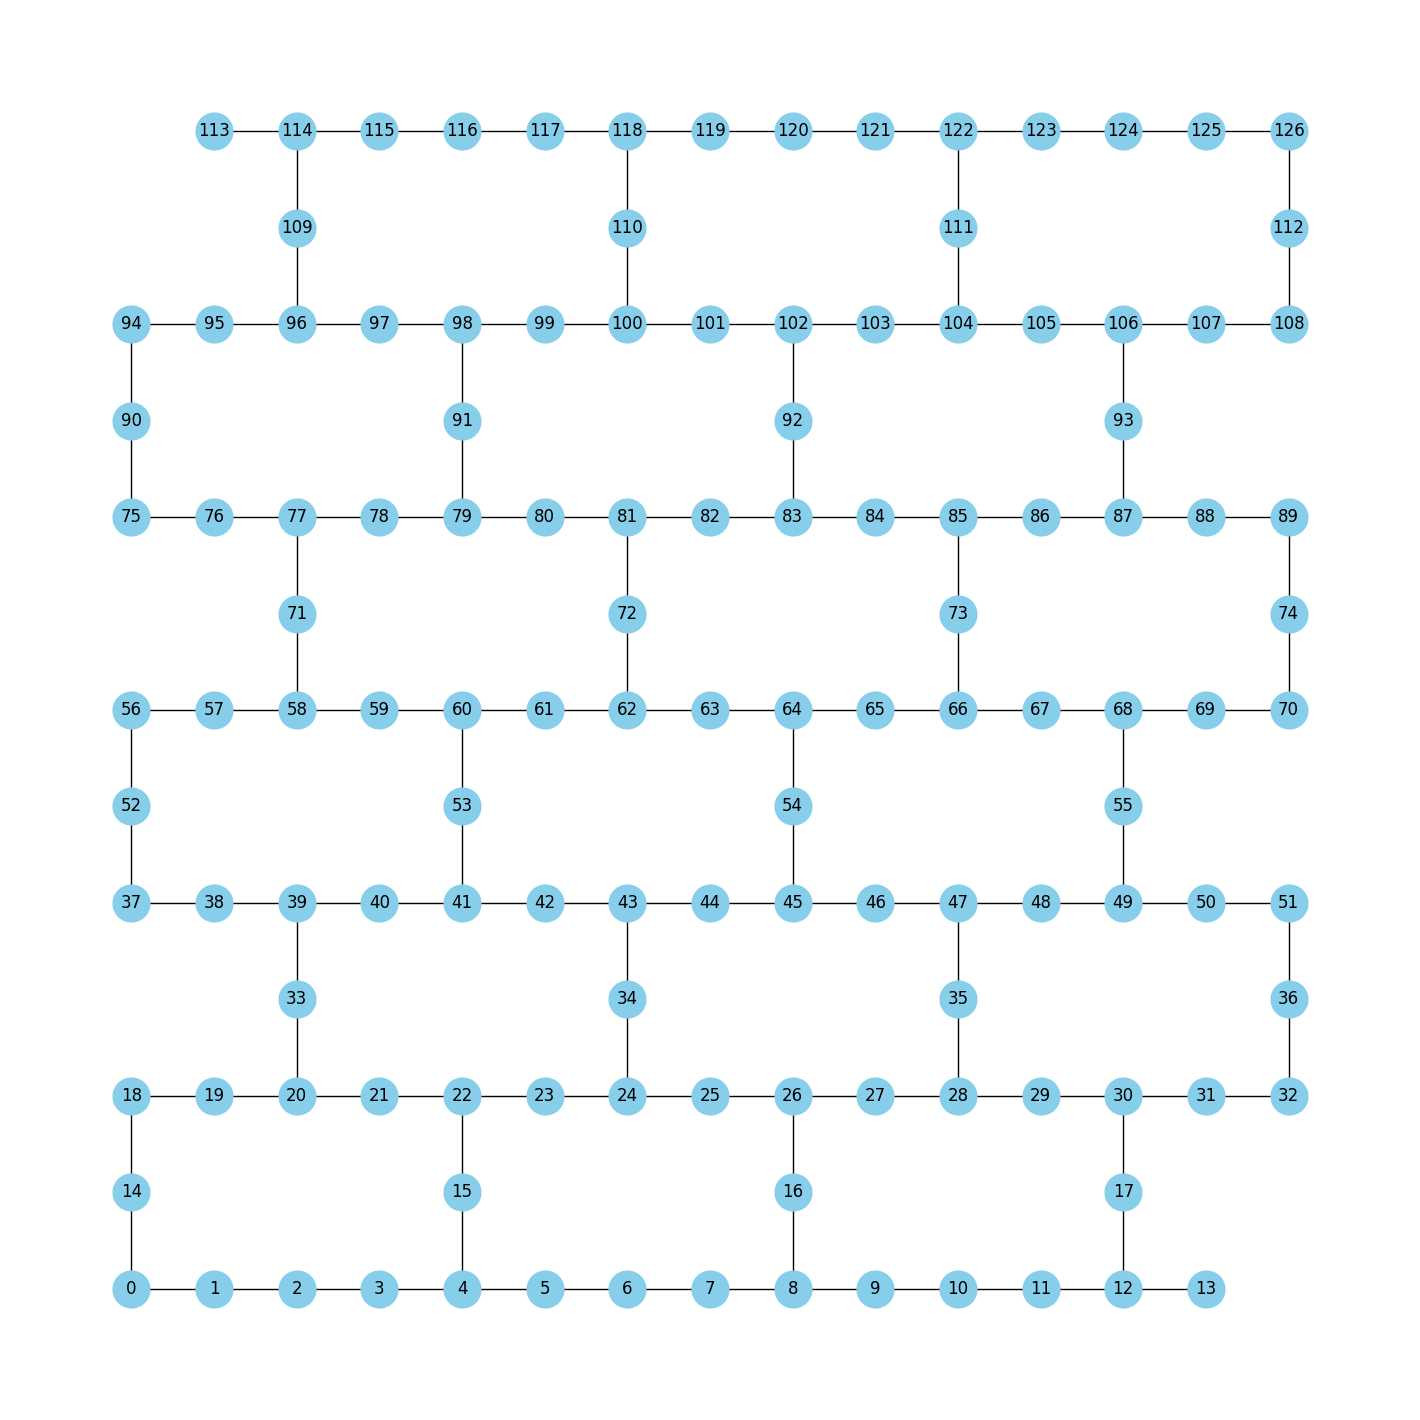

In [6]:
import graph
graph_class = importlib.reload(graph)
graph = graph_class.Graph()
for edge in coupling_map:
    graph.add_edge(edge[0], edge[1])
graph.draw(14,14)

In [7]:
subgraphs = graph.divide_graph()

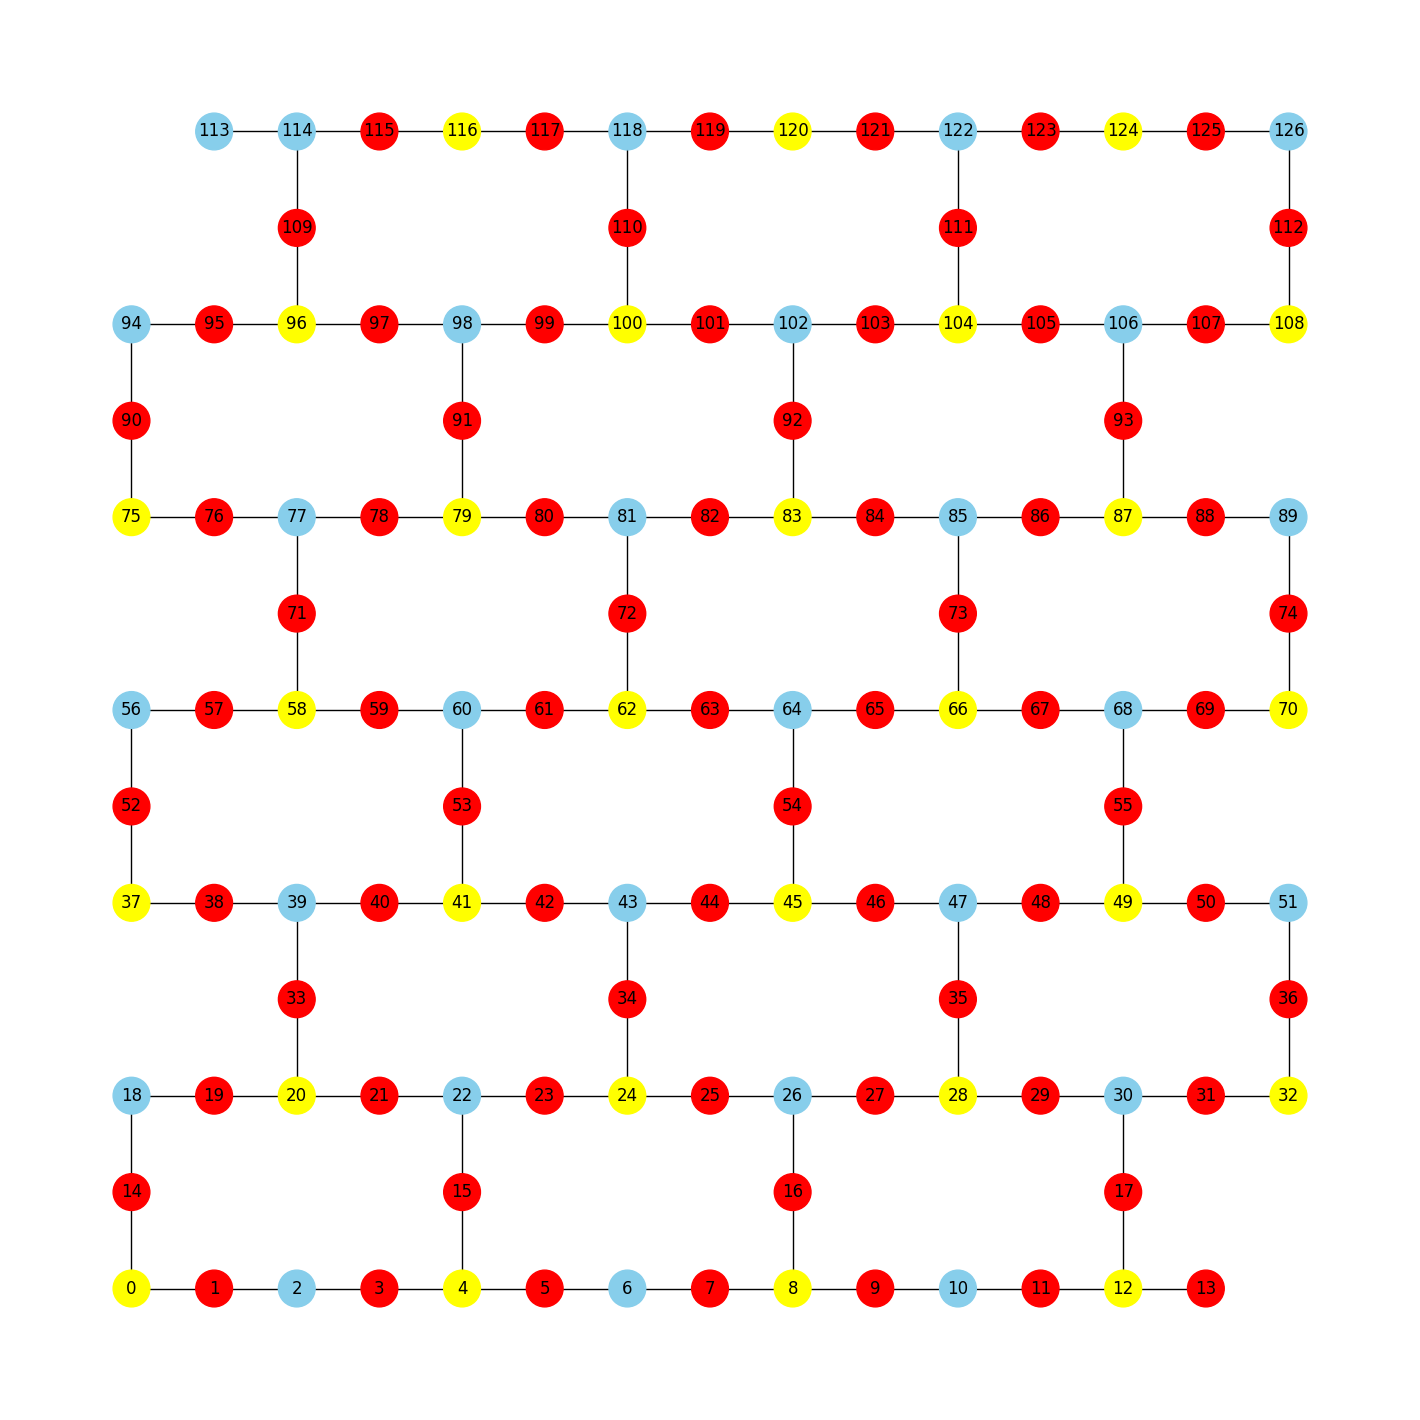

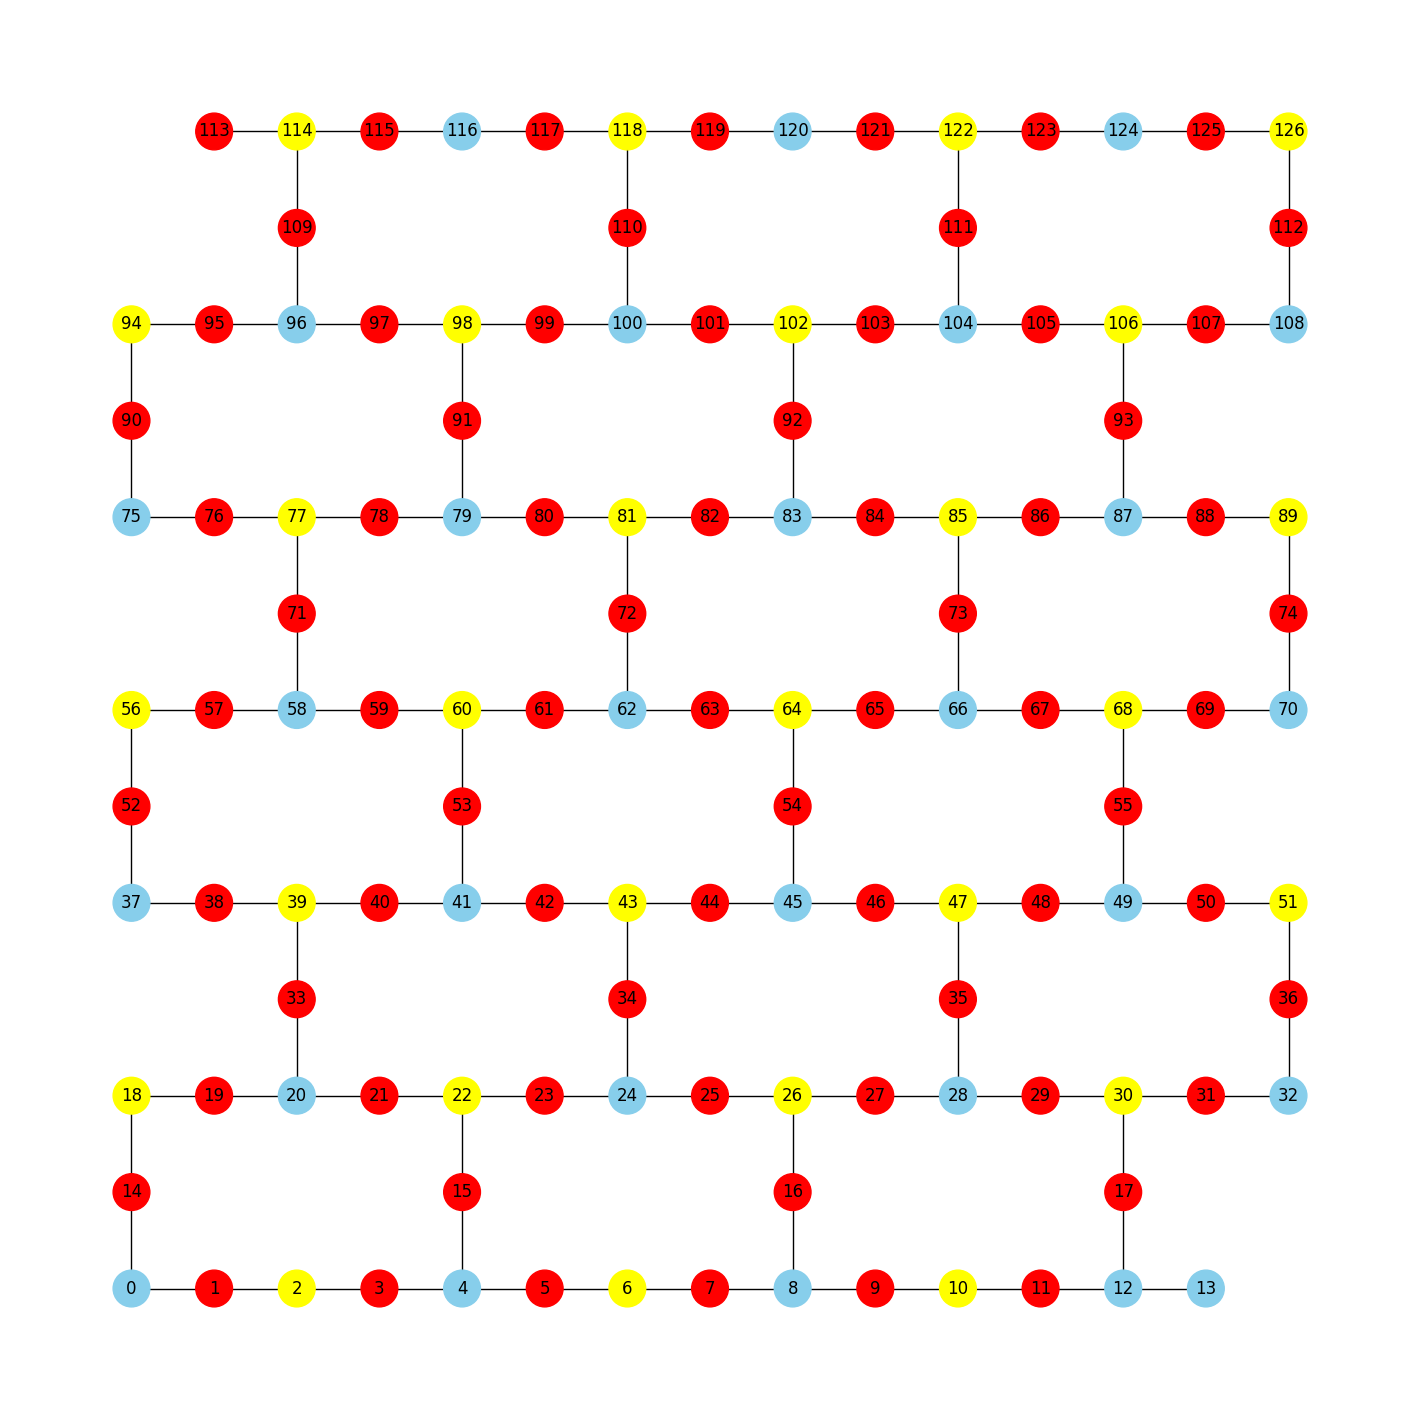

In [8]:
for subgraph in subgraphs:
    graph.draw(14,14, subgraph=subgraph)

In [9]:
import numpy as np

n = 10  # Number of rows
m = 6  # Number of columns
graph = graph_class.Graph()
graph.create_grid(n, m)  # Define your grid dimensions n and m
average_degree = np.mean([len(graph.edges[node]) for node in list(graph.edges.keys())])
print("Average degree:", average_degree)
# g = 0
# for i in range(g):
#     # remove random edge
#     n = len(graph.get_nodes())
#     node = random.randint(0, n - 1)
#     neighbors = graph.edges[node]
#     if len(neighbors) > 0:
#         neighbor = random.choice(neighbors)
#         graph.remove_edge(node, neighbor)
#     else:
#         graph.remove_node(node)

subgraphs = graph.divide_graph()
print("Number of subgraphs:", len(subgraphs))

Average degree: 3.466666666666667
Number of subgraphs: 5


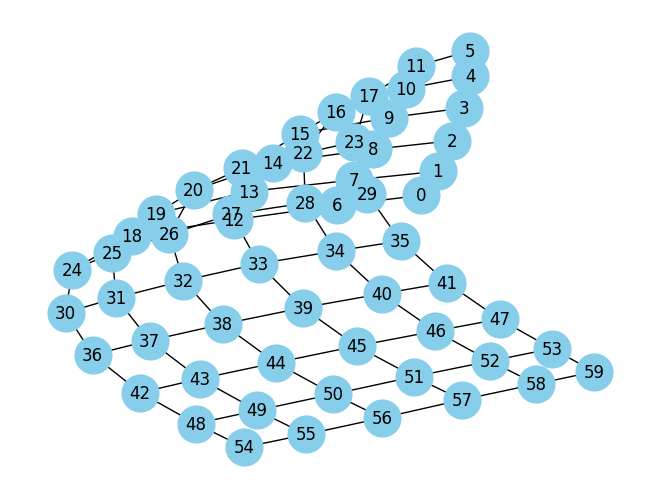

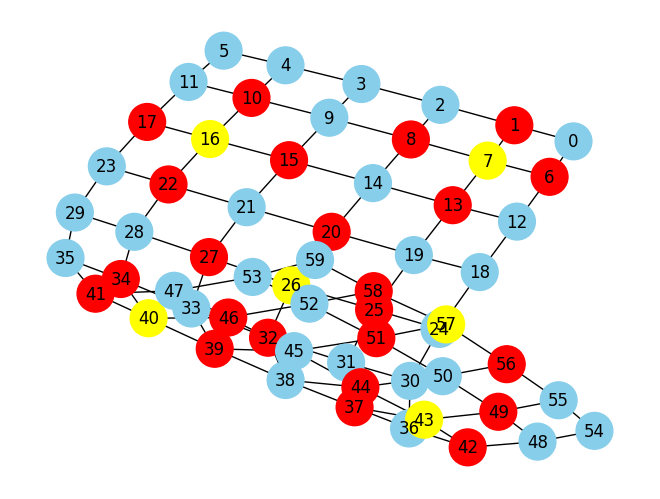

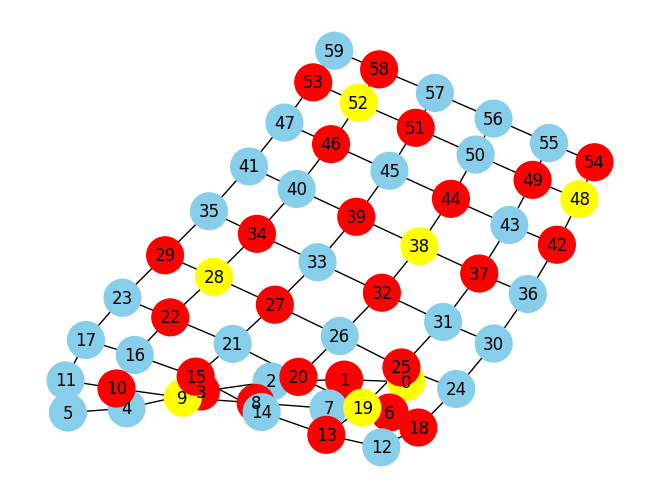

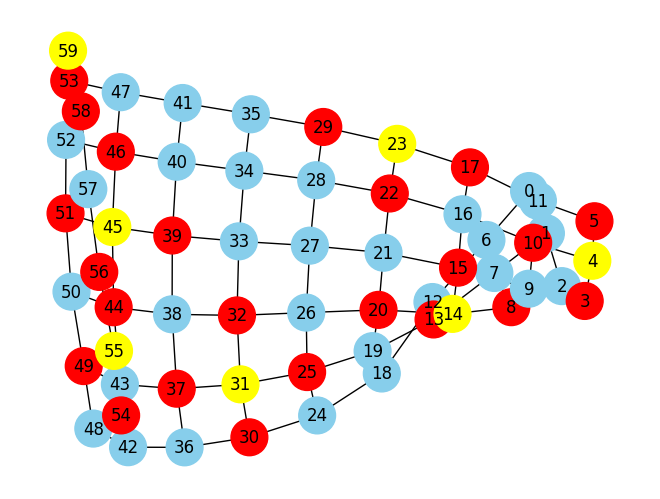

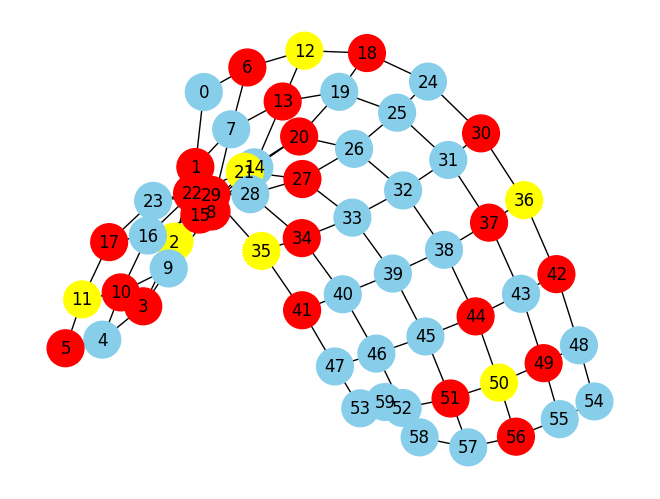

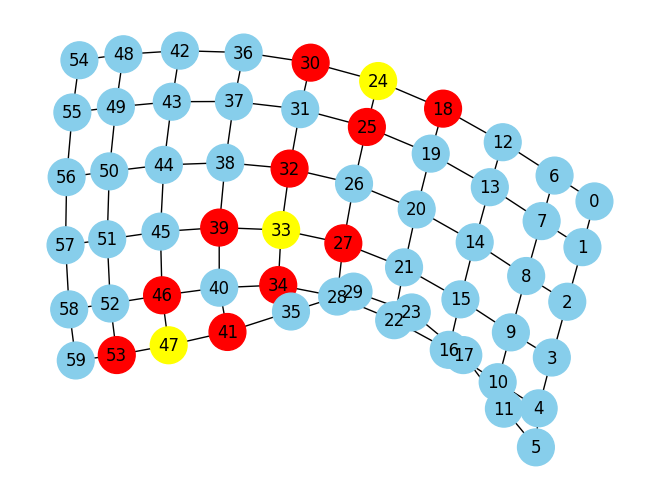

In [10]:
graph.draw()
for subgraph in subgraphs:
    graph.draw(subgraph=subgraph)

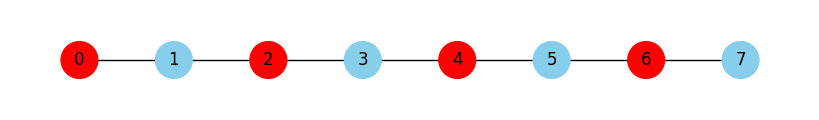

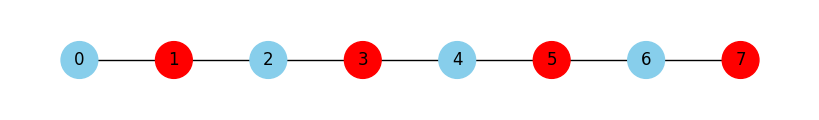

In [6]:
graph = graph_class.Graph()
graph.create_grid(1, 8)
# graph.add_edge(0, 1)
# graph.add_edge(1, 2)
# graph.add_edge(2, 3)
# graph.add_edge(3, 4)
# graph.add_edge(4, 5)

graphs = []
graph1 = graph_class.Graph()
graph1.add_edge(0, 2)
graph1.add_edge(2, 4)
graph1.add_edge(4, 6)
graph2 = graph_class.Graph()
graph2.add_edge(1, 3)
graph2.add_edge(3, 5)
graph2.add_edge(5, 7)
# graphs = graph.divide_graph()
graphs.append(graph1)
graphs.append(graph2)
for subgraph in graphs:
    graph.draw(1,8,subgraph=subgraph)

In [6]:
from chain_maker import GridChainGenerator
generator = GridChainGenerator(8, 1)
minimal_chains = generator.find_minimal_chains_for_arcs()
generator.draw_chains(minimal_chains)

NameError: name 'n' is not defined

Average degree: 1.6
Number of subgraphs: 2


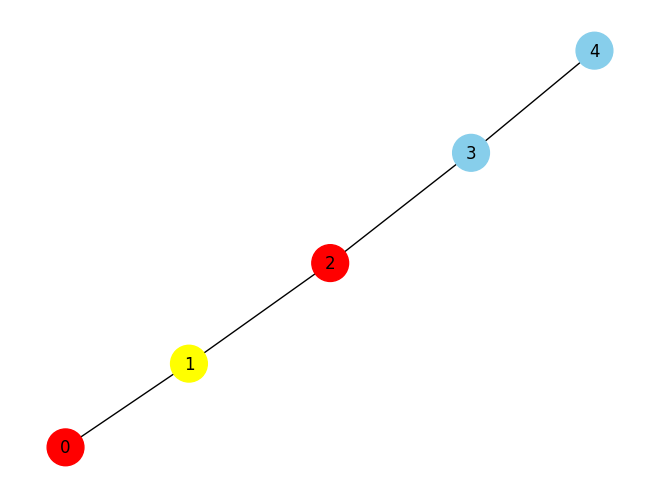

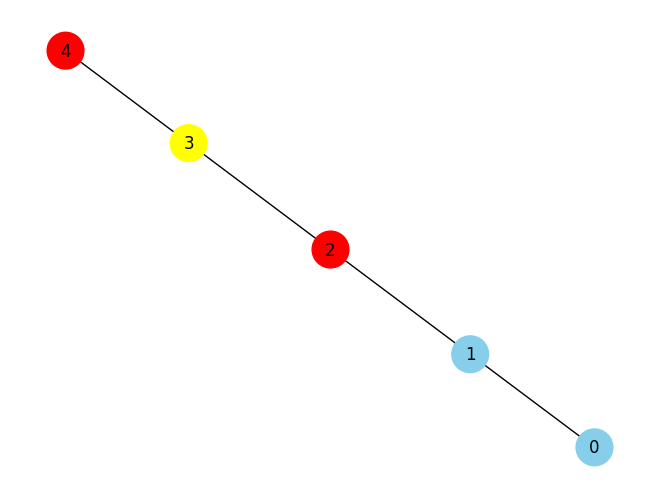

Subgraph 1:
  Flipped Nodes: {1}
  Edges: {1: [0, 2], 0: [1], 2: [1]}
Subgraph 2:
  Flipped Nodes: {3}
  Edges: {3: [2, 4], 2: [3], 4: [3]}


In [24]:
import numpy as np
import graph
n = 5  # Number of rows
m = 1  # Number of columns
g = graph.Graph()
g.create_grid(n, m)  # Define your grid dimensions n and m
average_degree = np.mean([len(g.edges[node]) for node in list(g.edges.keys())])
print("Average degree:", average_degree)
subgraphs = g.divide_graph()
print("Number of subgraphs:", len(subgraphs))
# g.draw()
for subgraph in subgraphs:
    g.draw(subgraph=subgraph)
graph.print_subgraphs(subgraphs)